# DS 3000 - Assignment [8]

**Student Name**: [Ivan Ng]

**Date**: [2/29/24]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

Load the data into a dataframe. Inspect the data and perform at least one type of data preparation


In [1]:
import pandas as pd

# Load the data into a dataframe
atp_df = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

# Inspect the first few rows of the dataframe
print("First few rows of the dataframe:")
print(atp_df.head())

First few rows of the dataframe:
   Activity Period Activity Period Start Date  \
0           199907                 1999/07/01   
1           199907                 1999/07/01   
2           199907                 1999/07/01   
3           199907                 1999/07/01   
4           199907                 1999/07/01   

                         Operating Airline Operating Airline IATA Code  \
0                             ATA Airlines                          TZ   
1                             ATA Airlines                          TZ   
2                             ATA Airlines                          TZ   
3  Aeroflot Russian International Airlines                         NaN   
4  Aeroflot Russian International Airlines                         NaN   

                         Published Airline Published Airline IATA Code  \
0                             ATA Airlines                          TZ   
1                             ATA Airlines                          TZ   
2    

In [2]:
# Check for null values in each column
null_values = atp_df.isnull().sum()

print(null_values)

Activity Period                  0
Activity Period Start Date       0
Operating Airline                0
Operating Airline IATA Code    316
Published Airline                0
Published Airline IATA Code    316
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                  0
data_as_of                       0
data_loaded_at                   0
dtype: int64


In [3]:
# Remove rows with missing data as 316 matches
atp_df_cleaned = atp_df.dropna()

null_values_2 = atp_df_cleaned.isnull().sum()
# Check again to see if it was specific rows that were missing data
print(null_values_2)

Activity Period                0
Activity Period Start Date     0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
data_as_of                     0
data_loaded_at                 0
dtype: int64


In [4]:
# Check data types of each column in atp_df_cleaned
# All data types are correct
print(atp_df_cleaned.dtypes)

Activity Period                 int64
Activity Period Start Date     object
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
data_as_of                     object
data_loaded_at                 object
dtype: object


## Question 2: 
Determine which terminal has the most passenger traffic and visualize the results. Explain the graph.


In [5]:
# Group data by terminal and sum passenger counts
terminal_passenger_counts = atp_df_cleaned.groupby('Terminal')['Passenger Count'].sum().reset_index()
    
print(terminal_passenger_counts)

        Terminal  Passenger Count
0  International        245498921
1          Other              182
2     Terminal 1        228497563
3     Terminal 2         95244190
4     Terminal 3        415215075


Text(0.5, 1.0, 'Total Passenger Count by Terminal')

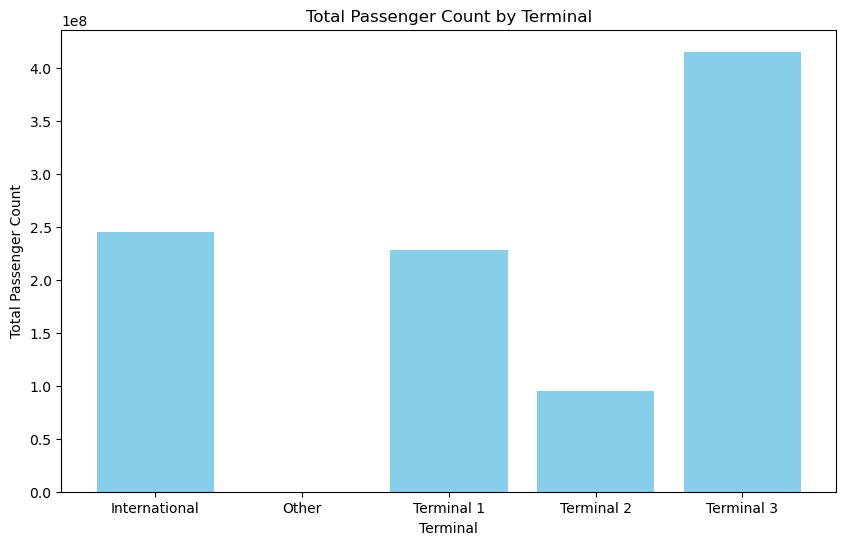

In [6]:
import matplotlib.pyplot as plt

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(terminal_passenger_counts['Terminal'], terminal_passenger_counts['Passenger Count'], color='skyblue')
plt.xlabel('Terminal')
plt.ylabel('Total Passenger Count')
plt.title('Total Passenger Count by Terminal')

In [7]:
# Terminal 3 has the most passengers.
# The bar graph shows the distribution of passengers among the terminals.
# Following terminal 3 is internation terminal followed closely by terminal 1.
# Terminal 2 has the least and Other has a very minimal passenger count.

## Question 3: 
Plot the annual domestic and international enplanement and deplanement using a line chart. Explain the patterns and discuss which years have the most and least passenger traffic.


In [8]:
# Group data by activity period and sum passenger counts
annual_passenger_counts = atp_df_cleaned.groupby(['Activity Period', 'GEO Summary', 'Activity Type Code']).agg({'Passenger Count': 'sum'}).reset_index()

print(annual_passenger_counts)

      Activity Period    GEO Summary Activity Type Code  Passenger Count
0              199907       Domestic           Deplaned          1617446
1              199907       Domestic           Enplaned          1612044
2              199907       Domestic     Thru / Transit            29679
3              199907  International           Deplaned           366074
4              199907  International           Enplaned           341819
...               ...            ...                ...              ...
1685           202311       Domestic           Enplaned          1510254
1686           202311       Domestic     Thru / Transit              952
1687           202311  International           Deplaned           533882
1688           202311  International           Enplaned           561054
1689           202311  International     Thru / Transit             5227

[1690 rows x 4 columns]


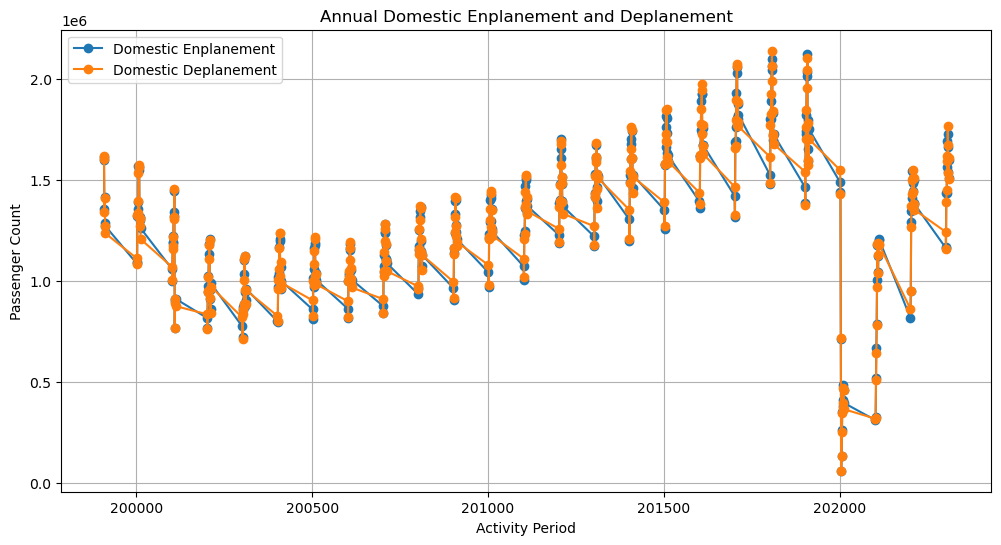

In [9]:
# Separate data for domestic passengers
domestic_grouped = annual_passenger_counts[annual_passenger_counts['GEO Summary'] == 'Domestic']

# Separates the domestic passengers
domestic_enplaned = domestic_grouped[domestic_grouped['Activity Type Code'] == 'Enplaned']
domestic_deplaned = domestic_grouped[domestic_grouped['Activity Type Code'] == 'Deplaned']

# Plotting line chart for domestic travelers
plt.figure(figsize=(12, 6))
plt.plot(domestic_enplaned['Activity Period'], domestic_enplaned['Passenger Count'], label='Domestic Enplanement', marker='o')
plt.plot(domestic_deplaned['Activity Period'], domestic_deplaned['Passenger Count'], label='Domestic Deplanement', marker='o')
plt.xlabel('Activity Period')
plt.ylabel('Passenger Count')
plt.title('Annual Domestic Enplanement and Deplanement')
plt.legend()
plt.grid(True)

In [10]:
# Domestic flights slowly dipped starting 2000 until about 2003.
# Afterwards it experiences a steady increase for more than 10 years
# until about 2019 where it will hit its peak.
# In which it will see a drastic dip between 2019 and 2020.
# After an extreme low in 2020, it will rise up extremely quickly
# over the next couple years.

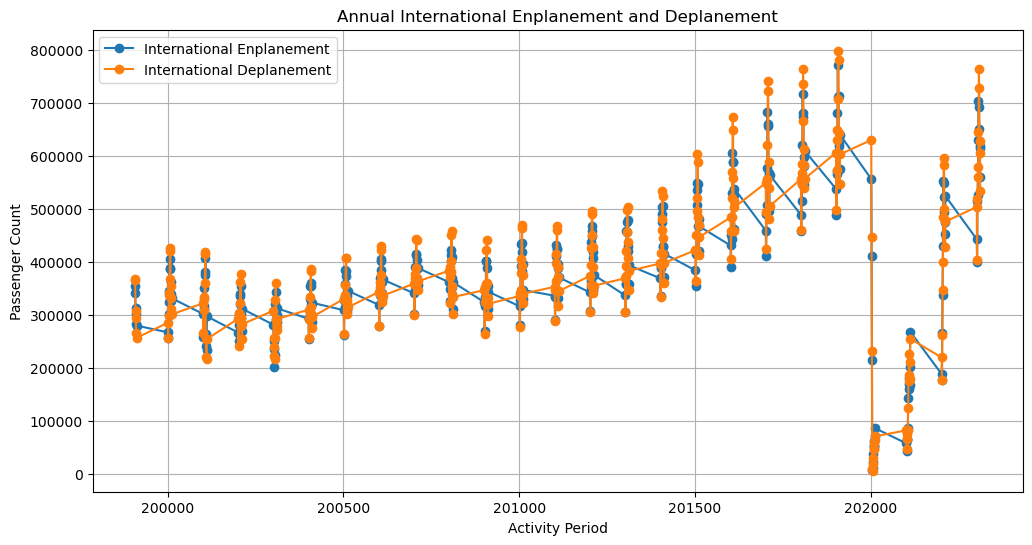

In [11]:
# Separate data for internation passengers
international_grouped = annual_passenger_counts[annual_passenger_counts['GEO Summary'] == 'International']

# Separates the international passengers
international_enplaned = international_grouped[international_grouped['Activity Type Code'] == 'Enplaned']
international_deplaned = international_grouped[international_grouped['Activity Type Code'] == 'Deplaned']

# Plotting line chart for international travelers
plt.figure(figsize=(12, 6))
plt.plot(international_enplaned['Activity Period'], international_enplaned['Passenger Count'], label='International Enplanement', marker='o')
plt.plot(international_deplaned['Activity Period'], international_deplaned['Passenger Count'], label='International Deplanement', marker='o')
plt.xlabel('Activity Period')
plt.ylabel('Passenger Count')
plt.title('Annual International Enplanement and Deplanement')
plt.legend()
plt.grid(True)

In [12]:
# From 2000 to 2010 international flgihts are steady,
# decreasing and increasing slightly.
# From then it experiences a significantly moderate increase
# until about 2019 in which it takes a drastic dip until 2020.
# After which it will increase extremely fast.

## Question 4: 
Demonstrate which airlines contributed to the most passenger traffic over the last 10 years and visualize the results**? Are there changes in the top airlines each year? Ensure that you visualize the top 5 airlines and explain the patterns.


In [13]:
# Group data by airline and year, then sum passenger counts
annual_passenger_airline = atp_df_cleaned.groupby(['Activity Period', 'Published Airline']).agg({'Passenger Count': 'sum'}).reset_index()

print(annual_passenger_airline)

       Activity Period     Published Airline  Passenger Count
0               199907          ATA Airlines            65303
1               199907            Air Canada            47737
2               199907             Air China             9587
3               199907            Air Europe              205
4               199907            Air France            19211
...                ...                   ...              ...
11068           202311       United Airlines          1947703
11069           202311  Vietnam Airlines JSC             6575
11070           202311       Virgin Atlantic            14402
11071           202311      WestJet Airlines             3928
11072           202311      ZIPAIR Tokyo Inc             9946

[11073 rows x 3 columns]


In [14]:
# Filter the data for dates past 2013 (Last 10 years)
filtered_apa = annual_passenger_airline[annual_passenger_airline['Activity Period'] > 201300]

print(filtered_apa)

       Activity Period     Published Airline  Passenger Count
5746            201301            Aeromexico             7455
5747            201301            Air Canada            33516
5748            201301             Air China            14646
5749            201301            Air France            14515
5750            201301       Air New Zealand            21271
...                ...                   ...              ...
11068           202311       United Airlines          1947703
11069           202311  Vietnam Airlines JSC             6575
11070           202311       Virgin Atlantic            14402
11071           202311      WestJet Airlines             3928
11072           202311      ZIPAIR Tokyo Inc             9946

[5327 rows x 3 columns]


In [15]:
# Initialize an empty DataFrame to store results
result_df = pd.DataFrame(columns=[])

# Iterate over each hundred after 201300
for hundred in range(2014, 2024):  # From 2014 to 2023 (10 years)
    # Filter data for the current hundred
    current_hundred_data = annual_passenger_airline[(annual_passenger_airline['Activity Period'] > hundred * 100) 
                                                    & (annual_passenger_airline['Activity Period'] < (hundred + 1) * 100)]
        
    # Calculate max passenger count for the current hundred
    max_passenger_row = current_hundred_data.loc[current_hundred_data['Passenger Count'].idxmax()]
    
    # Concatenate max_passenger_row with the result DataFrame
    result_df = pd.concat([result_df, max_passenger_row.to_frame().T], ignore_index=True)
    
print(result_df)

  Activity Period Published Airline Passenger Count
0          201408   United Airlines         2062911
1          201507   United Airlines         2121393
2          201608   United Airlines         2276847
3          201708   United Airlines         2507549
4          201807   United Airlines         2598780
5          201908   United Airlines         2712627
6          202001   United Airlines         1929027
7          202112   United Airlines         1390448
8          202207   United Airlines         1996461
9          202307   United Airlines         2325102


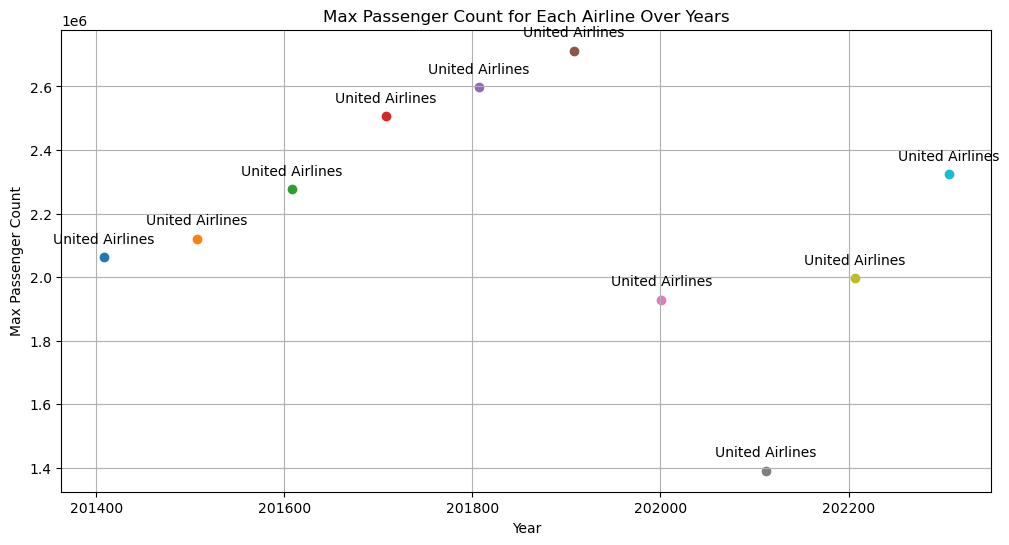

In [16]:
# Plotting the scatter plot
plt.figure(figsize=(12, 6))

# Iterate over each row
for i in range(10):
    # Scatter plot each point
    plt.scatter(result_df['Activity Period'][i], 
                result_df['Passenger Count'][i], 
                marker='o')  # Use 'o' marker for all points

    # Annotate each point with its corresponding airline name
    plt.annotate(result_df['Published Airline'][i], 
                 (result_df['Activity Period'][i], result_df['Passenger Count'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Year')
plt.ylabel('Max Passenger Count')
plt.title('Max Passenger Count for Each Airline Over Years')
plt.grid(True)

In [17]:
# There is no change in the top Airline it is always United Airlines.

## Question 5: 
Extract data from 2003 to 2018 (inclusive), for all passengers who deplaned the aircraft in May e.g. May 2003, May 2004, May 2005 etc. Visualize the extracted data, using a line chart, and comment on the trend.


Text(0.5, 1.0, 'Passenger Count Over Years')

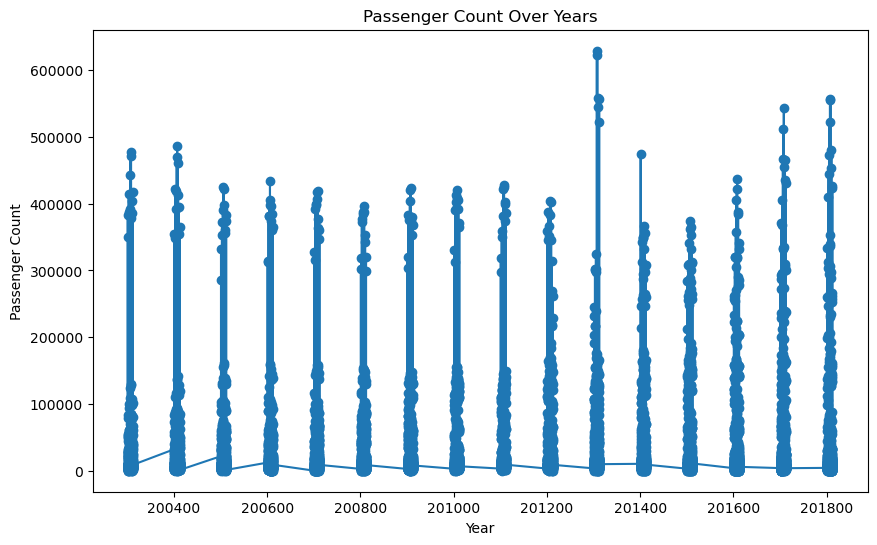

In [18]:
# Filter for deplaned passengers
enplaned_pass = atp_df_cleaned[atp_df_cleaned['Activity Type Code'] == 'Enplaned']

# Filter for 2003 to 2018
filter_q5 = enplaned_pass[(enplaned_pass['Activity Period'] > 200300) 
                          & (enplaned_pass['Activity Period'] < 201900)]
                             
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(filter_q5['Activity Period'], filter_q5['Passenger Count'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.title('Passenger Count Over Years')

In [19]:
# The passenger counts are increasing and decreasing
# but it overall decreases until about 2013.
# At which point it skyrockets to a peak in 2013.
# After this peak it drops back to its previous performance until
# they make substantial increases onwards to 2018.

## Question 6: 
Predict the passenger count for May 2019 and May 2020, using simple linear regression. Ensure that you visualize the original data and also include the predictions from the model. Compare the predicted passenger count with the actual passenger count. In your explanation, discuss how close/far your predictions are from the actual values.


In [20]:
import numpy as np

# Filter data from 2003 to 2018 (inclusive)
filter_q6 = atp_df_cleaned[(atp_df_cleaned['Activity Period'] > 200300) 
                          & (atp_df_cleaned['Activity Period'] < 201900)]

grouped_q6 = filter_q6.groupby('Activity Period')['Passenger Count'].sum().reset_index()

<Axes: xlabel='Activity Period', ylabel='Passenger Count'>

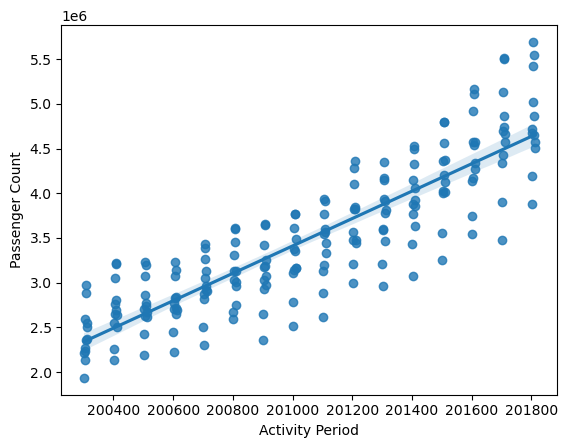

In [21]:
import seaborn as sns

# Plot scatterplot with best fit line
sns.regplot(data=grouped_q6, x='Activity Period', y='Passenger Count')

In [22]:
from sklearn.linear_model import LinearRegression

# Extract features (year) and target (passenger count)
X = grouped_q6['Activity Period'].to_numpy()
X = X.reshape(-1, 1)
Y = grouped_q6['Passenger Count'].to_numpy()
Y = Y.reshape(-1, 1)

model = LinearRegression(fit_intercept=True)
model = model.fit(X, Y)

# Make predictions for May 2019 and May 2020
predictions = model.predict(np.array([202005, 202105]).reshape(-2, 1))

print('The intercept is: ', model.intercept_[0])
print('The slope is: ', model.coef_[0, 0])
print(predictions)

The intercept is:  -304453694.56801784
The slope is:  1531.6616881754276
[[4949624.75185943]
 [5102790.92067695]]


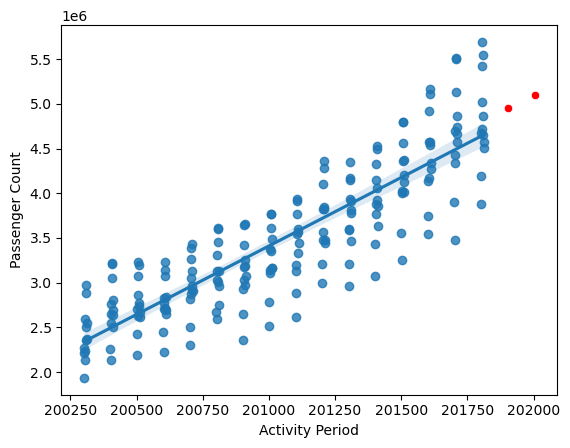

In [23]:
# Plot scatterplot with best fit line
sns.regplot(data=grouped_q6, x='Activity Period', y='Passenger Count')

# Add predictions
sns.scatterplot(x=[201905, 202005], y=[4949624, 5102790], color='red')

plt.show()

In [24]:
# Get actual values of May 2019 and 2020
grouped_non_filtered = atp_df_cleaned.groupby('Activity Period')['Passenger Count'].sum().reset_index()

may2019 = grouped_non_filtered.loc[grouped_non_filtered['Activity Period'] == 201905].iloc[0]
may2020 = grouped_non_filtered.loc[grouped_non_filtered['Activity Period'] == 202005].iloc[0]

print(may2019)
print(may2020)

Activity Period     201905
Passenger Count    5001414
Name: 238, dtype: int64
Activity Period    202005
Passenger Count    286227
Name: 250, dtype: int64


In [25]:
# The prediction for May 2019 was extremely close only being off by about
# 50000 which is proportionally about 1%.
# The prediction for May 2020 was way off because May 2020 was an outlier
# which experienced an extreme drop.

## Question 7: 
Calculate the R-squared and explain what this tells you about the model.


In [28]:
grouped_q7 = atp_df_cleaned.groupby('Activity Period')['Passenger Count'].sum().reset_index()

# Extract features (year) and target (passenger count)
X2 = grouped_q7['Activity Period'].to_numpy()
X2 = X2.reshape(-1, 1)
Y2 = grouped_q7['Passenger Count'].to_numpy()
Y2 = Y2.reshape(-1, 1)

# get r-squared

print('r-squared: ', model.score(X2, Y2))

r-squared:  -0.5748993306270427


In [ ]:
# This tells me the model has outliers or measurements making
# the model be a poor fit.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
